## Using Notebook Environments 
1. To run a cell, press `shift + enter`. The notebook will execute the code in the cell and move to the next cell. If the cell contains a markdown cell (text only), it will render the markdown and move to the next cell.
2. Since cells can be executed in any order and variables can be over-written, you may at some point feel that you have lost track of the state of your notebook. If this is the case, you can always restart the kernel by clicking Runtime in the menu bar (if you're using Colab) and selecting `Restart runtime`. This will clear all variables and outputs.
3. The final variable in a cell will be printed on the screen. If you want to print multiple variables, use the `print()` function as usual.

Notebook environments support code cells and markdown cells. For the purposes of this workshop, markdown cells are used to provide high-level explanations of the code. More specific details are provided in the code cells themselves in the form of comments (lines beginning with `#`)

In [ ]:
import sys
if 'google.colab' in sys.modules:  # If in Google Colab environment
    # Installing requisite packages
    !pip install transformers

    # Mount google drive to enable access to data files
    from google.colab import drive
    drive.mount('/content/drive')

    # Change working directory to health
    %cd /content/drive/MyDrive/LLM4SocBeSci/day_1

We begin by loading the requisite packages. For those coming from R, packages in Python are sometimes given shorter names for use in the code via the `import <name> as <nickname>` syntax (e.g. `import pandas as pd`). These are usually standardized nicknames. We here make use two packages:

1. `pandas`: A very popular package for reading and manipulating data in python.
2. `transformers`: A HF package for loading and manipulating transformer-based models.

In [2]:
 import pandas as pd
from transformers import pipeline

## Sentiment Analysis 

The dataset contains 1000 randomly sampled tweets from [Sentiment140](https://www.kaggle.com/datasets/kazanova/sentiment140), collected by [Go et al., (2009)](https://www-cs-faculty.stanford.edu/people/alecmgo/papers/TwitterDistantSupervision09.pdf). It contains two columns:
1. `tweet`: The text of the tweet.
2. `sentiment`: The sentiment of the tweet (`'POSITIVE'` or `'NEGATIVE'`)

In [16]:
# Loads first 1000 rows from the csv file
twitter = pd.read_csv('twitter.csv')
twitter['sentiment'] = twitter['sentiment'].replace({0: 'NEGATIVE',  4: 'POSITIVE'})
twitter

,tweet,sentiment
0,@JenniferHen ...alk or anything hope you had ...,POSITIVE
1,Super hott outsidee! On my way to matamoros 2 ...,POSITIVE
2,Is updating twitter from her NEW computer my ...,POSITIVE
3,hates that i have to work today! i want to be ...,NEGATIVE
4,@twinsquirrel me too... nice to have coffee w...,POSITIVE
...,...,...
995,It's #followfriday so I'm suggesting you follo...,POSITIVE
996,Jack daniels blew up in the cooler,NEGATIVE
997,Strawberry Mentos are the BEST!! thanks again ...,POSITIVE
998,@shaylay11 awww thats soo saad,NEGATIVE


<Axes: >

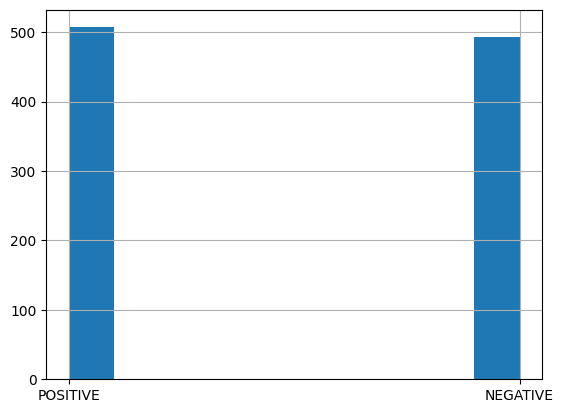

In [20]:
twitter['sentiment'].hist()

In [18]:
# Load sentiment analysis pipeline
pipe = pipeline('sentiment-analysis')

# Predict sentiment of tweets
predictions = pipe(twitter['tweet'].tolist())
predictions[:10]

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'NEGATIVE', 'score': 0.9996434450149536},
 {'label': 'POSITIVE', 'score': 0.989424467086792},
 {'label': 'POSITIVE', 'score': 0.9993859529495239},
 {'label': 'NEGATIVE', 'score': 0.9835692048072815},
 {'label': 'POSITIVE', 'score': 0.9971075654029846},
 {'label': 'POSITIVE', 'score': 0.9996768236160278},
 {'label': 'NEGATIVE', 'score': 0.7675129771232605},
 {'label': 'POSITIVE', 'score': 0.9445950984954834},
 {'label': 'NEGATIVE', 'score': 0.9981271624565125},
 {'label': 'POSITIVE', 'score': 0.9478254914283752}]

In [19]:
# Joining the predictions with the original data
twitter['sentiment_pred'] = [x['label'] for x in predictions]
twitter

,tweet,sentiment,sentiment_pred
0,@JenniferHen ...alk or anything hope you had ...,POSITIVE,NEGATIVE
1,Super hott outsidee! On my way to matamoros 2 ...,POSITIVE,POSITIVE
2,Is updating twitter from her NEW computer my ...,POSITIVE,POSITIVE
3,hates that i have to work today! i want to be ...,NEGATIVE,NEGATIVE
4,@twinsquirrel me too... nice to have coffee w...,POSITIVE,POSITIVE
...,...,...,...
995,It's #followfriday so I'm suggesting you follo...,POSITIVE,NEGATIVE
996,Jack daniels blew up in the cooler,NEGATIVE,NEGATIVE
997,Strawberry Mentos are the BEST!! thanks again ...,POSITIVE,POSITIVE
998,@shaylay11 awww thats soo saad,NEGATIVE,NEGATIVE


In [21]:
# Checking the accuracy of the model
true_or_false = twitter['sentiment'] == twitter['sentiment_pred']
accuracy = true_or_false.sum() / len(true_or_false)
accuracy

0.719

## Zero-shot Classification

In [ ]:
prompt = "Classify this tweet as either 'POSITIVE' or 'NEGATIVE': "
